In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from math import *

from IPython.display import Math
from IPython import display

import Envs.Brachi2 as Brachi
import Agents.MCFA as MCFA



%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
%load_ext autoreload
%autoreload 2

KeyboardInterrupt: 

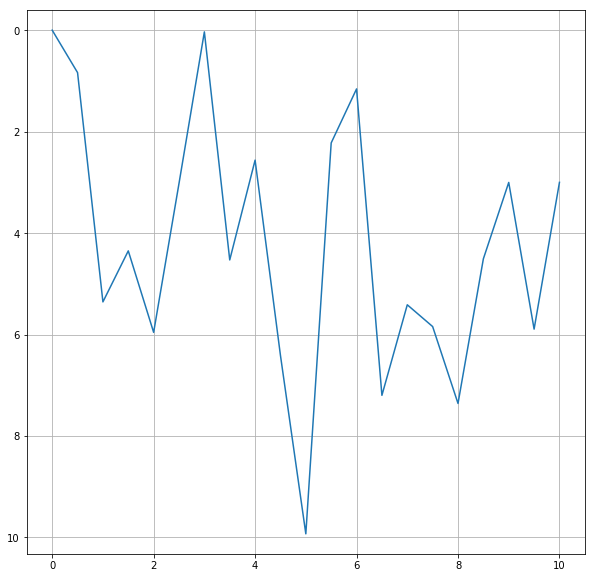

In [2]:

verbose = False

#Make sure the discretization of the solution is the same as the enviroment
delta_x = 0.5
range_x = (0,10)
y_final = 3
circle = None
env = Brachi.Env(y_final, delta_x = delta_x, range_x = range_x, circle = circle)



range_y = (0,10)
actor = MCFA.Agent(y_final, range_y = range_y, delta_x = delta_x, range_x = range_x, )
print(actor.theta)

#Loop through episodes for training:
episodeNum = 5000
maxStepPerEpisode = 100
history = []
for i in range(episodeNum):
    print(i)
    xx = [0]
    yy = [0]
    env.reset()
    state = env.state  #After reset, this is the initial state
    reward = 0
    done = False
    actor.new_episode_reset()  #Reset the returns list to start fresh for a new episode. 
    for t in range(maxStepPerEpisode): 
        if done:
            action = actor.act(state, done, reward = reward) #register reward of the final step
            if verbose: print( 'time step: %3d' % t, ' state:', state, ' reward: %3.2f' % reward, ' done:', done, ' action: None', ' location:', (xx[t], yy[t]) )
            break
        action = actor.act(state, done, reward = reward)
        if verbose: print( 'time step: %3d' % t, ' state:', state, ' reward: %3.2f' % reward, ' done:', done, ' action:', action, ' location:', (xx[t], yy[t]) )
        state, reward, done = env.step(action)
        xx.append(state[0])
        yy.append(state[1])
    print(actor.theta)    
    actor.update()  #Update action value function
    
    
    #also record xx, yy and total reward of the current episode
    if i%1 == 0:
        plt.clf()
        plt.plot(xx, yy)
        plt.axis('equal')
        plt.gca().invert_yaxis()
        plt.grid()
        display.clear_output(wait=True)
        display.display(plt.gcf())
    
    if verbose: 
        print("Accumulated reward of the current episode %d is: %2.2f" % (i, env.accumulated_reward))
        print("")
    history.append(env.accumulated_reward)

In [ ]:
print(actor.theta)

In [ ]:
plt.clf()
plt.plot(np.arange(len(history)), np.array(history))
plt.show()

print("final score is %.2f" % history[-1])
print("best score (lowest time) is %.2f" % min(history))